# Graph Generation

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Raw

Let's consider how the raw signals look like:

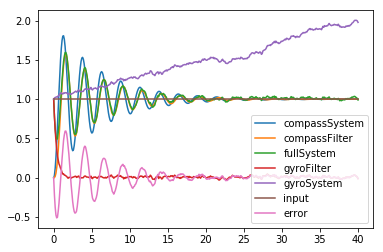

In [3]:
stepRaw = pd.read_csv("stepRaw.csv")
[plt.plot(stepRaw.time, stepRaw[i], label=i) for i in stepRaw.columns[stepRaw.columns != "time"]]
plt.legend()

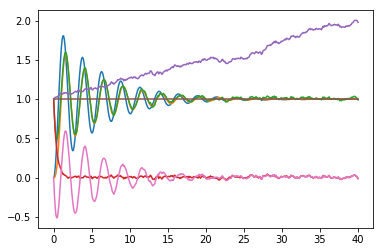

In [4]:
plt.plot(stepRaw.time, stepRaw[stepRaw.columns[stepRaw.columns != "time"]])

## Analytics

Note that if we want to model how the system error changes per 

In [5]:
# Input signal types modelled
signal_types = ["ramp", "step", "sine"]
full_model_data_raw = pd.DataFrame([])
for i in signal_types:
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            # Select iteration cutoff frequency from file name
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            iteration_read_data = pd.read_csv("./cutoffVariations/" + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([iteration_cutoff_frequency] * len(iteration_read_data))
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            # Append into model
            full_model_data_raw = full_model_data_raw.append(iteration_read_data, ignore_index=True)
full_model_data_raw

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals,cutoffFrequency,signalType
0,compassSystem,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.12649,ramp
1,compassFilter,32.091048,0.000000,13.504995,9.995303,9.990609e+01,1.749048,0.239062,0,9.965879e+01,2.378396e+02,1.737133e+04,0.12649,ramp
2,fullSystem,40.126723,0.000000,19.961436,11.711481,1.371588e+02,1.800481,-0.000418,0,1.368193e+02,-6.696151e-01,3.370413e+04,0.12649,ramp
3,gyroFilter,8.084963,0.000000,6.456441,2.067357,4.273967e+00,4.397910,-1.536587,0,4.263388e+00,-1.352663e+01,7.993851e+01,0.12649,ramp
4,gyroSystem,40.976671,0.000000,20.340501,11.956389,1.429552e+02,1.801300,0.004443,0,1.426014e+02,7.565722e+00,3.662971e+04,0.12649,ramp
5,input,40.000000,0.000000,19.851624,11.674118,1.362850e+02,1.798909,0.000806,0,1.359477e+02,1.277456e+00,3.324703e+04,0.12649,ramp
6,error,0.219177,0.000000,0.109812,0.050364,2.536527e-03,2.163298,-0.008135,0,2.530249e-03,-1.035427e-06,1.384978e-05,0.12649,ramp
7,compassSystem,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.15999,ramp
8,compassFilter,33.706573,0.000000,14.572057,10.482884,1.098909e+02,1.734813,0.190472,0,1.096188e+02,2.186049e+02,2.084602e+04,0.15999,ramp
9,fullSystem,40.084214,0.000000,19.933131,11.701080,1.369153e+02,1.799963,0.000016,0,1.365764e+02,2.592547e-02,3.357491e+04,0.15999,ramp


In [6]:
# Create multiIndex for all model signals signalsNamesOrdered and input signalType
full_model_multiIndex = pd.MultiIndex.from_frame(full_model_data_raw.loc[:, ["signalsNamesOrdered","signalType"]])
# Remove index columns from DataFrame
full_model_data = full_model_data_raw.loc[:, (full_model_data_raw.columns != "signalsNamesOrdered") \
                                                       & (full_model_data_raw.columns != "signalType")].set_index(full_model_multiIndex)
full_model_data

,,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals,cutoffFrequency
signalsNamesOrdered,signalType,,,,,,,,,,,,
compassSystem,ramp,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.12649
compassFilter,ramp,32.091048,0.000000,13.504995,9.995303,9.990609e+01,1.749048,0.239062,0,9.965879e+01,2.378396e+02,1.737133e+04,0.12649
fullSystem,ramp,40.126723,0.000000,19.961436,11.711481,1.371588e+02,1.800481,-0.000418,0,1.368193e+02,-6.696151e-01,3.370413e+04,0.12649
gyroFilter,ramp,8.084963,0.000000,6.456441,2.067357,4.273967e+00,4.397910,-1.536587,0,4.263388e+00,-1.352663e+01,7.993851e+01,0.12649
gyroSystem,ramp,40.976671,0.000000,20.340501,11.956389,1.429552e+02,1.801300,0.004443,0,1.426014e+02,7.565722e+00,3.662971e+04,0.12649
input,ramp,40.000000,0.000000,19.851624,11.674118,1.362850e+02,1.798909,0.000806,0,1.359477e+02,1.277456e+00,3.324703e+04,0.12649
error,ramp,0.219177,0.000000,0.109812,0.050364,2.536527e-03,2.163298,-0.008135,0,2.530249e-03,-1.035427e-06,1.384978e-05,0.12649
compassSystem,ramp,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.15999
compassFilter,ramp,33.706573,0.000000,14.572057,10.482884,1.098909e+02,1.734813,0.190472,0,1.096188e+02,2.186049e+02,2.084602e+04,0.15999


In [7]:
full_model_data.index.levels[0]

Index(['compassFilter', 'compassSystem', 'error', 'fullSystem', 'gyroFilter',
       'gyroSystem', 'input'],
      dtype='object', name='signalsNamesOrdered')

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


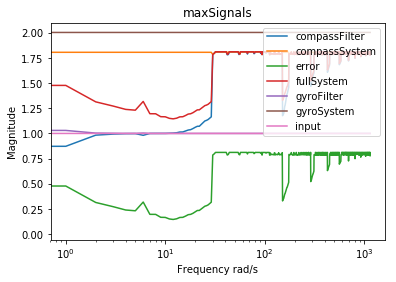

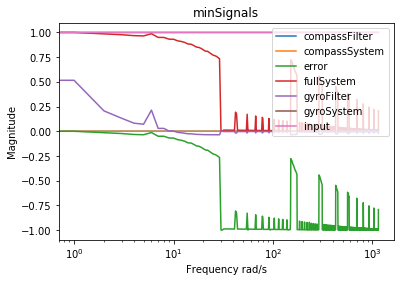

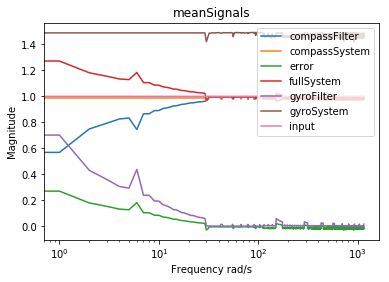

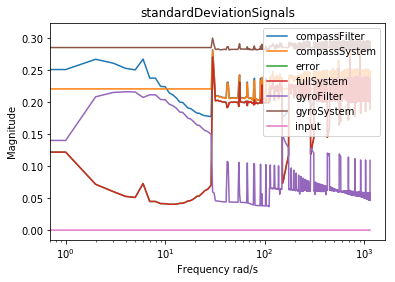

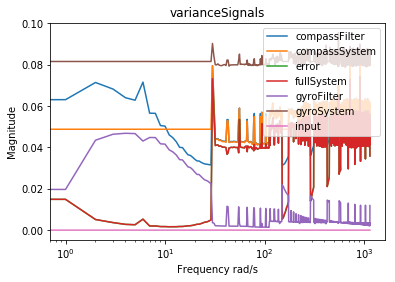

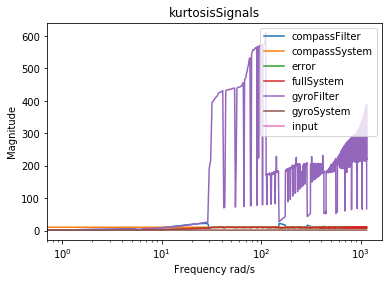

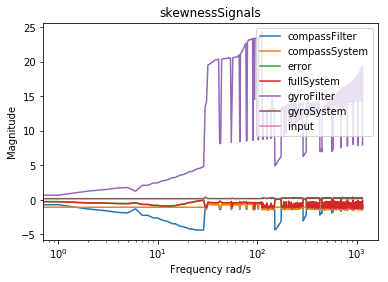

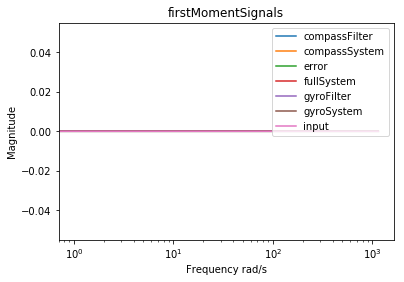

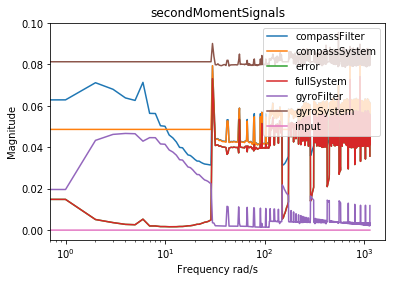

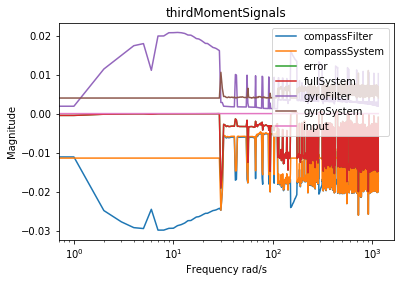

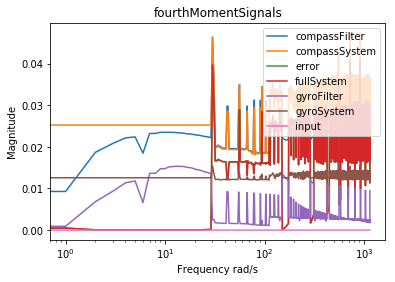

In [8]:
signal = "step"
i = 0
# Select all analytic metrics except cutoffFrequency
for analytic_metric in full_model_data.columns[full_model_data.columns != "cutoffFrequency"]:
    for model_signal in full_model_data.index.levels[0]: # model signals signalsNamesOrdered list
        # Index per model signals signalsNamesOrdered for only for one input signalType
        model_signal_data = full_model_data.loc[pd.IndexSlice[model_signal, signal], :] # Surely there must be a more memory efficient way of doing this
    
        plt.figure(i)
        plt.plot(model_signal_data.cutoffFrequency, model_signal_data[analytic_metric], label=model_signal)
        plt.title(analytic_metric)
        plt.ylabel('Magnitude')
        plt.xlabel('Frequency rad/s')
        plt.xscale('log')
    i+=1
    plt.legend(loc="upper right")

## Analytics for all signals


So how will we determine the error from each signal accordingly? Let's assume it's propotional. We know the cutoff frequency determines how much of the compass dominates the response, and because its complementary, this also means how much of the gyro is not present in the response. So we want to know what is the error proportionality. We could in theory see the frequency response of the signals that we have, and compare as that changes. Do we have to create our own fast fourier transform response? Let's do it to see what happens.

How do we determine the error proportionality. We can consider a simple step signal case.

It would be inaccurate to linearly substract the value between the error and the 

We can model small UAV data of https://ieeexplore.ieee.org/abstract/document/6095129 and [A minimalist control strategy for small UAVs](https://ieeexplore.ieee.org/abstract/document/5354465), [Understanding Autonomous Drone Maneuverability
for Internet of Things Applications](https://research.csiro.au/ng/wp-content/uploads/sites/106/2016/08/Understanding-Autonomous-cameraready-2017.pdf). Here's the [Phantom 2 datasheet Max Angular Speed	150°/s](https://www.dji.com/uk/phantom-3-pro/info). [Mavic 2 pro Max Angular Velocity	200°/s](https://www.dji.com/uk/mavic-2/info#specs).